In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import holidays
import calendar
import datetime

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
import optuna
from darts import TimeSeries
from darts.models import AutoARIMA, LightGBMModel

In [5]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(font_scale=1.25)

In [6]:
data = pd.read_csv("train.csv")

In [7]:
train = pd.DataFrame()
train["Unit"] = data["БЕ"]
train["Date"] = data["Дата транзакции"]
train["RUB"] = data["Сумма в RUB"]

In [8]:
train_0 = train[train["Unit"]==0][["Date", "RUB"]]
train_0.set_index(pd.to_datetime(train_0["Date"]), inplace=True)
train_0.drop(["Date"], inplace=True, axis=1)

train_1 = train[train["Unit"]==1][["Date", "RUB"]]
train_1.set_index(pd.to_datetime(train_1["Date"]), inplace=True)
train_1.drop(["Date"], inplace=True, axis=1)

train_2 = train[train["Unit"]==2][["Date", "RUB"]]
train_2.set_index(pd.to_datetime(train_2["Date"]), inplace=True)
train_2.drop(["Date"], inplace=True, axis=1)

train_3 = train[train["Unit"]==3][["Date", "RUB"]]
train_3.set_index(pd.to_datetime(train_3["Date"]), inplace=True)
train_3.drop(["Date"], inplace=True, axis=1)

train_4 = train[train["Unit"]==4][["Date", "RUB"]]
train_4.set_index(pd.to_datetime(train_4["Date"]), inplace=True)
train_4.drop(["Date"], inplace=True, axis=1)

train_5 = train[train["Unit"]==5][["Date", "RUB"]]
train_5.set_index(pd.to_datetime(train_5["Date"]), inplace=True)
train_5.drop(["Date"], inplace=True, axis=1)

train_6 = train[train["Unit"]==6][["Date", "RUB"]]
train_6.set_index(pd.to_datetime(train_6["Date"]), inplace=True)
train_6.drop(["Date"], inplace=True, axis=1)

In [9]:
train_4.tail()

,RUB
Date,
2020-12-03,-1.827086e+07
2020-12-10,-2.430930e+07
2020-12-17,-2.360431e+07
2020-12-24,-2.186163e+07
2020-12-28,-3.086100e+06


In [10]:
train_4_1d = train_4.resample('1D').sum()
train_4_1d = pd.concat([train_4_1d, pd.DataFrame([0, 0, 0], columns=["RUB"], index=[pd.to_datetime("2020-12-29"), pd.to_datetime("2020-12-30"), pd.to_datetime("2020-12-31")])])
train_4_1d.index.name = "Date"

In [11]:
train_4_1d.tail()

,RUB
Date,
2020-12-27,0.000000e+00
2020-12-28,-3.086100e+06
2020-12-29,0.000000e+00
2020-12-30,0.000000e+00
2020-12-31,0.000000e+00


<AxesSubplot:xlabel='Date'>

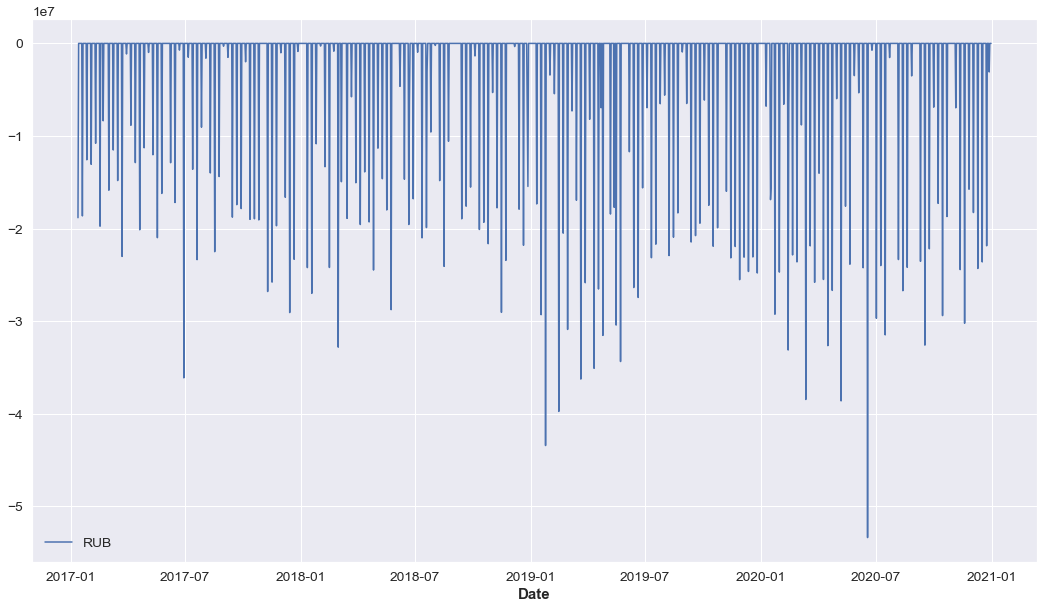

In [12]:
sns.lineplot(data=train_4_1d)

In [13]:
##############################################################################################################################################################################################

In [14]:
### Generalized valid data ###
# Данные, выданные к финалу - первый квартал 2021 года
data = pd.read_excel("1кв2021_1.xlsx")

In [15]:
val = pd.DataFrame()
val["Unit"] = data["БЕ"]
val["Date"] = data["Расчет ликвидности - дата"]
val["RUB"] = data["Сумма в валюте транзакции"]

In [16]:
val_0 = val[val["Unit"]==0][["Date", "RUB"]]
val_0.set_index(pd.to_datetime(val_0["Date"], dayfirst=True), inplace=True)
val_0.drop("Date", inplace=True, axis=1)

val_1 = val[val["Unit"]==1][["Date", "RUB"]]
val_1.set_index(pd.to_datetime(val_1["Date"], dayfirst=True), inplace=True)
val_1.drop("Date", inplace=True, axis=1)

val_2 = val[val["Unit"]==2][["Date", "RUB"]]
val_2.set_index(pd.to_datetime(val_2["Date"], dayfirst=True), inplace=True)
val_2.drop("Date", inplace=True, axis=1)

val_3 = val[val["Unit"]==3][["Date", "RUB"]]
val_3.set_index(pd.to_datetime(val_3["Date"], dayfirst=True), inplace=True)
val_3.drop("Date", inplace=True, axis=1)

val_4 = val[val["Unit"]==4][["Date", "RUB"]]
val_4.set_index(pd.to_datetime(val_4["Date"], dayfirst=True), inplace=True)
val_4.drop("Date", inplace=True, axis=1)

val_5 = val[val["Unit"]==5][["Date", "RUB"]]
val_5.set_index(pd.to_datetime(val_5["Date"], dayfirst=True), inplace=True)
val_5.drop("Date", inplace=True, axis=1)

val_6 = val[val["Unit"]==6][["Date", "RUB"]]
val_6.set_index(pd.to_datetime(val_6["Date"], dayfirst=True), inplace=True)
val_6.drop("Date", inplace=True, axis=1)

<img src="https://miro.medium.com/max/1400/1*B1oKvhOuYoTdFEnwl8SEpg.png">

In [17]:
first_quarter = pd.DataFrame()
first_quarter.index = pd.date_range(start='1/1/2021', end='31/08/2021')
first_quarter["RUB"] = 0

val_0_1d = pd.DataFrame()
val_0_1d.index = pd.merge(val_0, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_0_1d.index.name = "Date"
val_0_1d["RUB"] = pd.merge(val_0, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_1_1d = pd.DataFrame()
val_1_1d.index = pd.merge(val_1, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_1_1d.index.name = "Date"
val_1_1d["RUB"] = pd.merge(val_1, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_2_1d = pd.DataFrame()
val_2_1d.index = pd.merge(val_2, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_2_1d.index.name = "Date"
val_2_1d["RUB"] = pd.merge(val_2, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_3_1d = pd.DataFrame()
val_3_1d.index = pd.merge(val_3, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_3_1d.index.name = "Date"
val_3_1d["RUB"] = pd.merge(val_3, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_4_1d = pd.DataFrame()
val_4_1d.index = pd.merge(val_4, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_4_1d.index.name = "Date"
val_4_1d["RUB"] = pd.merge(val_4, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_5_1d = pd.DataFrame()
val_5_1d.index = pd.merge(val_5, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_5_1d.index.name = "Date"
val_5_1d["RUB"] = pd.merge(val_5, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

val_6_1d = pd.DataFrame()
val_6_1d.index = pd.merge(val_6, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"].index
val_6_1d.index.name = "Date"
val_6_1d["RUB"] = pd.merge(val_6, first_quarter, how='outer', left_index=True, right_index=True).fillna(0)["RUB_x"]

In [18]:
##############################################################################################################################################################################################

In [19]:
# Feature engineering
# Добавляем регрессоры

In [20]:
def dayofweek(df):
    df["Dayofweek"] = df.index.dayofweek
    return df

In [21]:
def get_holidays(df):
    df["Holidays"] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday('RUS').get(x)).values
    df["Holidays"] = df["Holidays"].astype('bool').astype('int')
    return df

In [22]:
def number_of_week_in_year(df):
    df["Number_of_week_in_year"] = df.index.isocalendar().week
    df["Number_of_week_in_year"] = df["Number_of_week_in_year"].astype(int)
    return df

In [23]:
def number_of_week_in_month(df):
    def week_of_month(tgtdate):
        days_this_month = calendar.mdays[tgtdate.month]
        for i in range(1, days_this_month):
            d = datetime.datetime(tgtdate.year, tgtdate.month, i)
            if d.day - d.weekday() > 0:
                startdate = d
                break
        return (tgtdate - startdate).days //7 + 1
    df["Number_of_week_in_month"] = df.index.to_series().apply(week_of_month)
    return df

In [24]:
def number_of_day_in_month(df):
    df["Number_of_day_in_month"] = df.index.day
    return df

In [25]:
def number_of_day_in_year(df):
    df["Number_of_day_in_year"] = df.index.dayofyear
    return df

In [26]:
def get_month(df):
    df["Month"] = df.index.month
    return df

In [27]:
def get_season(df):
    df["Season"] = df.index.month%12 // 3 + 1
    return df

In [29]:
def payday(df, payday):
    df["Payday"] = 0 
    df.loc[df.index.day_name() == payday, "Payday"] = 1
    return df

In [30]:
(
    train_4_1d.pipe(dayofweek)
    .pipe(get_holidays)
    .pipe(number_of_week_in_year)
    .pipe(number_of_week_in_month)
    .pipe(number_of_day_in_month)
    .pipe(number_of_day_in_year)
    .pipe(get_month)
    .pipe(get_season)
    .pipe(payday, payday="Thursday")
)

,RUB,Dayofweek,Holidays,Number_of_week_in_year,Number_of_week_in_month,Number_of_day_in_month,Number_of_day_in_year,Month,Season,Payday
Date,,,,,,,,,,
2017-01-12,-1.882559e+07,3,0,2,2,12,12,1,1,1
2017-01-13,0.000000e+00,4,0,2,2,13,13,1,1,0
2017-01-14,0.000000e+00,5,0,2,2,14,14,1,1,0
2017-01-15,0.000000e+00,6,0,2,2,15,15,1,1,0
2017-01-16,0.000000e+00,0,0,3,3,16,16,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.000000e+00,6,0,52,3,27,362,12,1,0
2020-12-28,-3.086100e+06,0,0,53,4,28,363,12,1,0
2020-12-29,0.000000e+00,1,0,53,4,29,364,12,1,0


In [31]:
(
    val_4_1d.pipe(dayofweek)
    .pipe(get_holidays)
    .pipe(number_of_week_in_year)
    .pipe(number_of_week_in_month)
    .pipe(number_of_day_in_month)
    .pipe(number_of_day_in_year)
    .pipe(get_month)
    .pipe(get_season)
    .pipe(payday, payday="Thursday")
)

,RUB,Dayofweek,Holidays,Number_of_week_in_year,Number_of_week_in_month,Number_of_day_in_month,Number_of_day_in_year,Month,Season,Payday
Date,,,,,,,,,,
2021-01-01,0.0,4,1,53,0,1,1,1,1,0
2021-01-02,0.0,5,1,53,0,2,2,1,1,0
2021-01-03,0.0,6,1,53,0,3,3,1,1,0
2021-01-04,0.0,0,1,1,1,4,4,1,1,0
2021-01-05,0.0,1,1,1,1,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-27,0.0,4,0,34,4,27,239,8,3,0
2021-08-28,0.0,5,0,34,4,28,240,8,3,0
2021-08-29,0.0,6,0,34,4,29,241,8,3,0


In [32]:
list(train_4_1d.columns.values)

['RUB',
 'Dayofweek',
 'Holidays',
 'Number_of_week_in_year',
 'Number_of_week_in_month',
 'Number_of_day_in_month',
 'Number_of_day_in_year',
 'Month',
 'Season',
 'Payday']

In [33]:
##############################################################################################################################################################################################

In [34]:
# Darts модели

In [35]:
train_4_1d_reindex = train_4_1d["RUB"].reset_index(inplace=False)
train_4_1d_covariates = train_4_1d.drop("RUB", inplace=False, axis=1).reset_index()

val_4_1d_reindex = val_4_1d.loc["2021-01-01":"2021-03-31","RUB"].reset_index(inplace=False)
val_4_1d_covariates = val_4_1d.drop("RUB", inplace=False, axis=1).reset_index()

In [36]:
total_4_1d = pd.concat([train_4_1d, val_4_1d.loc["2021-01-01":"2021-03-31"]])
total_4_1d_reindex = total_4_1d["RUB"].reset_index(inplace=False)

In [37]:
series_1d_total = TimeSeries.from_dataframe(total_4_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)

In [38]:
covariates = pd.concat([train_4_1d_covariates, val_4_1d_covariates])

In [39]:
series_1d_train = TimeSeries.from_dataframe(train_4_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)
series_1d_val = TimeSeries.from_dataframe(val_4_1d_reindex, time_col='Date', value_cols='RUB', freq='1d', fill_missing_dates=True)

In [41]:
series_1d_future_covariates = TimeSeries.from_dataframe(
    covariates,
    time_col="Date",
    value_cols=[
        "Dayofweek",
        "Holidays",
        "Number_of_week_in_year",
        "Number_of_week_in_month",
        "Number_of_day_in_month",
        "Number_of_day_in_year",
        "Month",
        "Season",
        "Payday",
    ],
    freq="1d",
    fill_missing_dates=True,
)

In [42]:
train_1d_split, local_val_1d_split = series_1d_train.split_before(0.80)
val_1d_split = series_1d_val

In [43]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [44]:
def objective_LGB(trial):

    # 
    model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1.0, log=True),
        lambda_l1=trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        lambda_l2=trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        min_gain_to_split=trial.suggest_float("min_gain_to_split", 0, 10.0),
        num_leaves=trial.suggest_int("num_leaves", 8, 256),
        feature_fraction=trial.suggest_uniform("feature_fraction", 0.0001, 1.0),
        bagging_fraction=trial.suggest_uniform("bagging_fraction", 0.0001, 1.0),
        bagging_freq=trial.suggest_int("bagging_freq", 0, 30),
        min_child_samples=trial.suggest_int("min_child_samples", 1, 100),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 3, 100),
        feature_pre_filter=False
    )  

    model1d.fit(train_1d_split, future_covariates=series_1d_future_covariates)
    prediction1d = model1d.predict(n=len(local_val_1d_split), future_covariates=series_1d_future_covariates)
    fixed_prediction1d = prediction1d.pd_dataframe()
    fixed_prediction1d[fixed_prediction1d["RUB"] > 0] = 0
    local_val = mean_absolute_error(local_val_1d_split.pd_dataframe(), fixed_prediction1d)
    
    model1d.fit(series_1d_train, future_covariates=series_1d_future_covariates)
    prediction1d = model1d.predict(n=len(val_1d_split), future_covariates=series_1d_future_covariates)
    fixed_prediction1d = prediction1d.pd_dataframe()
    fixed_prediction1d[fixed_prediction1d["RUB"] > 0] = 0
    global_val = mean_absolute_error(val_1d_split.pd_dataframe(), fixed_prediction1d)
    
    val = np.mean([local_val, global_val])

    trial.set_user_attr("Valid_score", val)

    print(f"MAE: {val}\n")

    return val

In [45]:
study_LGB = optuna.create_study(direction="minimize")
study_LGB.optimize(objective_LGB, n_trials=300, gc_after_trial=True)

[LightGBM] [Warning] feature_fraction is set=0.6817389605576728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817389605576728
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=86 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] min_gain_to_split is set=0.40386083849938026, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.40386083849938026
[LightGBM] [Warning] lambda_l1 is set=5.8905223486218476e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.8905223486218476e-05
[LightGBM] [Warning] bagging_fraction is set=0.45174223133547514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45174223133547514
[LightGBM] [Warning] lambda_l2 is set=1.9187429054312945e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9187429054312945e-07
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] featu

In [47]:
# {'learning_rate': 0.00563634023909283,
#  'lambda_l1': 4.0081899175921105,
#  'lambda_l2': 6.319718896443305,
#  'min_gain_to_split': 7.778512739781448,
#  'num_leaves': 91,
#  'feature_fraction': 0.1174792601155319,
#  'bagging_fraction': 0.49890546631284705,
#  'bagging_freq': 0,
#  'min_child_samples': 100,
#  'min_data_in_leaf': 12}
study_LGB.best_params

{'learning_rate': 0.00563634023909283,
 'lambda_l1': 4.0081899175921105,
 'lambda_l2': 6.319718896443305,
 'min_gain_to_split': 7.778512739781448,
 'num_leaves': 91,
 'feature_fraction': 0.1174792601155319,
 'bagging_fraction': 0.49890546631284705,
 'bagging_freq': 0,
 'min_child_samples': 100,
 'min_data_in_leaf': 12}

In [48]:
model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate=study_LGB.best_params["learning_rate"],
        lambda_l1=study_LGB.best_params["lambda_l1"],
        lambda_l2=study_LGB.best_params["lambda_l2"],
        min_gain_to_split=study_LGB.best_params["min_gain_to_split"],
        num_leaves=study_LGB.best_params["num_leaves"],
        feature_fraction=study_LGB.best_params["feature_fraction"],
        bagging_fraction=study_LGB.best_params["bagging_fraction"],
        bagging_freq=study_LGB.best_params["bagging_freq"],
        min_child_samples=study_LGB.best_params["min_child_samples"],
        min_data_in_leaf=study_LGB.best_params["min_data_in_leaf"],
        feature_pre_filter=False
    )  
model1d.fit(series_1d_train, future_covariates=series_1d_future_covariates)
prediction1d = model1d.predict(n=90, future_covariates=series_1d_future_covariates)

df_prediction1d = prediction1d.pd_dataframe()
df_prediction1d[df_prediction1d["RUB"]>0] = 0

[LightGBM] [Warning] feature_fraction is set=0.1174792601155319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1174792601155319
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_gain_to_split is set=7.778512739781448, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.778512739781448
[LightGBM] [Warning] lambda_l1 is set=4.0081899175921105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0081899175921105
[LightGBM] [Warning] bagging_fraction is set=0.49890546631284705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49890546631284705
[LightGBM] [Warning] lambda_l2 is set=6.319718896443305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.319718896443305
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


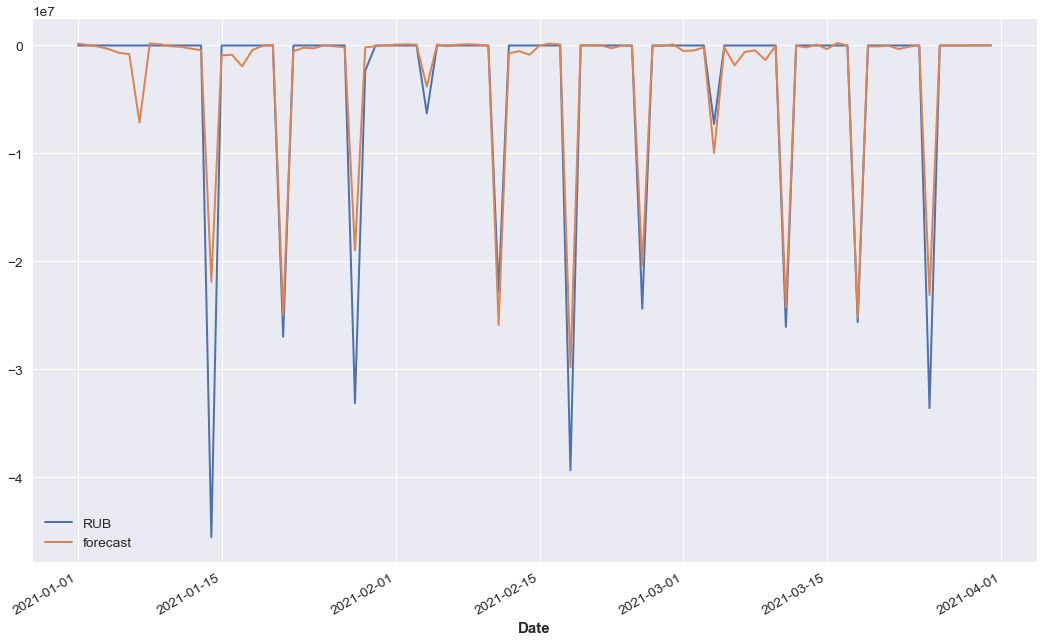

In [49]:
series_1d_val.plot()
prediction1d.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [50]:
mean_absolute_error(val_4_1d_reindex["RUB"], df_prediction1d["RUB"])

1126196.8561590752

In [51]:
val_df = pd.DataFrame()
val_df.index = df_prediction1d["RUB"].index
val_df["y"] = val_4_1d_reindex["RUB"].values
val_df["yhat"] = (df_prediction1d["RUB"])

In [52]:
BU0_group_stage = pd.read_csv("train_4_ans_ts.csv", usecols=[1,2])
BU0_group_stage.set_index("Дата транзакции", inplace=True)
BU0_group_stage.index.name = "Date"

In [53]:
val_df["yhat_groupstage"] = BU0_group_stage.loc[:"2021-03-31", "Сумма в RUB"].values

In [54]:
BU0_group_stage.loc[:"2021-03-31", "Сумма в RUB"]

Date
2021-01-01   -3.892027e+06
2021-01-02   -3.794252e+05
2021-01-03   -3.879359e+06
2021-01-04   -3.722009e+05
2021-01-05   -3.831978e+06
                  ...     
2021-03-27   -3.277198e+05
2021-03-28   -3.908244e+06
2021-03-29   -5.317032e+05
2021-03-30   -3.891273e+06
2021-03-31   -4.740060e+05
Name: Сумма в RUB, Length: 90, dtype: float64

In [55]:
val_df

,y,yhat,yhat_groupstage
Date,,,
2021-01-01,0.0,0.000000,-3.892027e+06
2021-01-02,0.0,0.000000,-3.794252e+05
2021-01-03,0.0,-106431.464317,-3.879359e+06
2021-01-04,0.0,-331992.529179,-3.722009e+05
2021-01-05,0.0,-689541.825300,-3.831978e+06
...,...,...,...
2021-03-27,0.0,0.000000,-3.277198e+05
2021-03-28,0.0,-20723.335054,-3.908244e+06
2021-03-29,0.0,0.000000,-5.317032e+05


<AxesSubplot:xlabel='Date'>

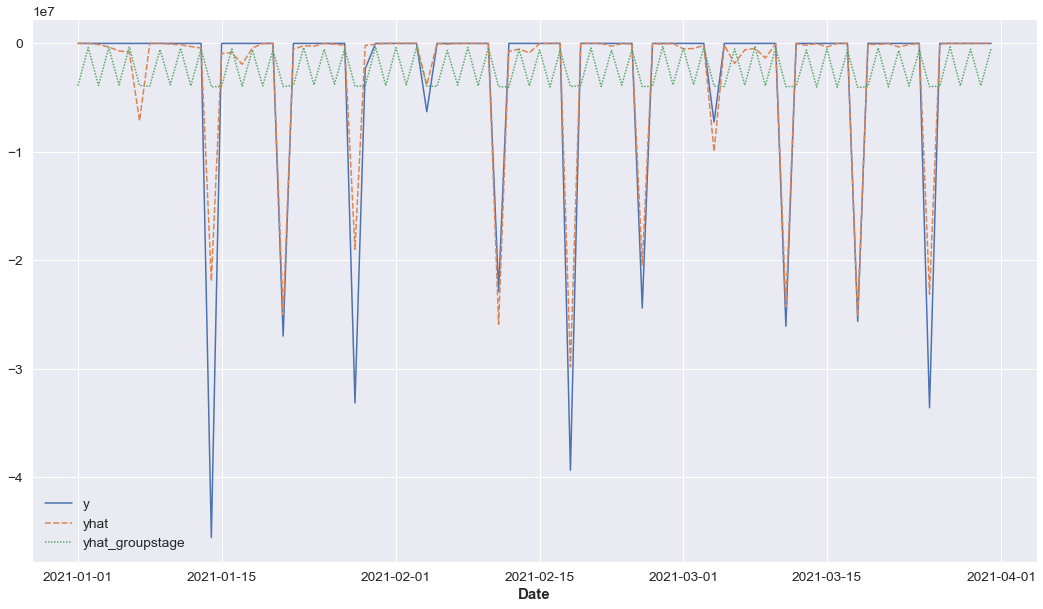

In [56]:
sns.lineplot(data=val_df)

In [57]:
mean_absolute_error(val_4_1d_reindex["RUB"], val_df["yhat_groupstage"])

4666760.257136128

In [58]:
##############################################################################################################################################################################################

In [59]:
# Refit на total

In [60]:
model1d = LightGBMModel(
        lags=None,
        lags_future_covariates=(61, 31),
        output_chunk_length=1,
        verbose=-1,
        metric="mae",
        n_estimators=1000,
        learning_rate=study_LGB.best_params["learning_rate"],
        lambda_l1=study_LGB.best_params["lambda_l1"],
        lambda_l2=study_LGB.best_params["lambda_l2"],
        min_gain_to_split=study_LGB.best_params["min_gain_to_split"],
        num_leaves=study_LGB.best_params["num_leaves"],
        feature_fraction=study_LGB.best_params["feature_fraction"],
        bagging_fraction=study_LGB.best_params["bagging_fraction"],
        bagging_freq=study_LGB.best_params["bagging_freq"],
        min_child_samples=study_LGB.best_params["min_child_samples"],
        min_data_in_leaf=study_LGB.best_params["min_data_in_leaf"],
        feature_pre_filter=False
    ) 
model1d.fit(series_1d_total, future_covariates=series_1d_future_covariates)
prediction1d_total = model1d.predict(n=91, future_covariates=series_1d_future_covariates)
df_prediction1d_total = prediction1d_total.pd_dataframe()

[LightGBM] [Warning] feature_fraction is set=0.1174792601155319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1174792601155319
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_gain_to_split is set=7.778512739781448, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.778512739781448
[LightGBM] [Warning] lambda_l1 is set=4.0081899175921105, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0081899175921105
[LightGBM] [Warning] bagging_fraction is set=0.49890546631284705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49890546631284705
[LightGBM] [Warning] lambda_l2 is set=6.319718896443305, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.319718896443305
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


In [61]:
df_prediction1d_total[df_prediction1d_total["RUB"]>0] = 0

In [62]:
train_4_ans_play_off = pd.DataFrame()
train_4_ans_play_off["Дата транзакции"] = pd.date_range(start="2021-04-01", end="2021-06-30", freq="1D")
train_4_ans_play_off["Сумма в RUB"] = (df_prediction1d_total["RUB"]).values
train_4_ans_play_off["Сумма в RUB"] = train_4_ans_play_off["Сумма в RUB"].groupby(train_4_ans_play_off["Дата транзакции"].dt.month).cumsum().values

train_4_ans_play_off["Месяц"] = train_4_ans_play_off["Дата транзакции"].dt.month
train_4_ans_play_off["БЕ"] = 4


In [63]:
train_4_ans_play_off

,Дата транзакции,Сумма в RUB,Месяц,БЕ
0,2021-04-01,-6.905618e+06,4,4
1,2021-04-02,-6.905618e+06,4,4
2,2021-04-03,-6.905618e+06,4,4
3,2021-04-04,-6.905618e+06,4,4
4,2021-04-05,-6.962121e+06,4,4
...,...,...,...,...
86,2021-06-26,-6.307732e+07,6,4
87,2021-06-27,-6.308762e+07,6,4
88,2021-06-28,-6.314334e+07,6,4
89,2021-06-29,-6.320328e+07,6,4


In [64]:
train_4_ans_play_off.to_csv("train_4_ans_play_off.csv")